Visualisation of Dense Layer activations.

Library used: tf_keras_vis (https://github.com/keisen/tf-keras-vis)

Few lines of code based on the examples from the repository mentioned above.

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

In [2]:
# Load model
model = tf.keras.models.load_model("model/AlexNet.h5")

In [3]:
NUM_CLASSES = 130
DATA_PATH = "data/"
CLASSES = ["dog", "bird", "berry", "flower", "other"]

In [4]:
data = []
for i in range(NUM_CLASSES):
    path = DATA_PATH + CLASSES[0] + "/" + str(i+1) + "_256.jpg"
    img = load_img(path, target_size=(224, 224))
    data.append(np.array(img))

data = np.asarray(data).astype("float32")

Steps: 100	Losses: [2.681795597076416],	Regularizations: [[('TotalVariation', 46.203521728515625), ('L2Norm', 0.025751983746886253)]]
Steps: 200	Losses: [5.682895660400391],	Regularizations: [[('TotalVariation', 81.910888671875), ('L2Norm', 0.025717969983816147)]]
Steps: 300	Losses: [14.229065895080566],	Regularizations: [[('TotalVariation', 49.6834716796875), ('L2Norm', 0.02566675655543804)]]
Steps: 400	Losses: [6.155520915985107],	Regularizations: [[('TotalVariation', 85.36739349365234), ('L2Norm', 0.02564234659075737)]]
Steps: 500	Losses: [14.73990535736084],	Regularizations: [[('TotalVariation', 52.336387634277344), ('L2Norm', 0.025598682463169098)]]


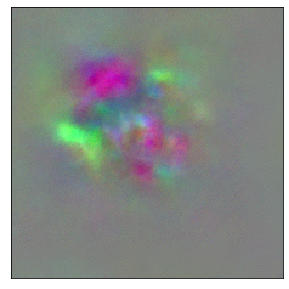

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print
from tf_keras_vis.utils.callbacks import GifGenerator


def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
activation_maximization = ActivationMaximization(model, model_modifier)

# define the number of the class wanted
loss = lambda x: K.mean(x[:, 0])

# Generate max activation with debug printing
activation = activation_maximization(loss,
                                     steps=500,
                                     callbacks=[ Print(interval=100), GifGenerator('activation_maximization')])
                                                
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()